# Student grades prediction

### Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
### Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
### Predict - CGPA of a student based on different grades in four years.

### Dataset Link-
•  https://github.com/dsrscientist/dataset4

•  https://github.com/dsrscientist/dataset4/blob/main/Grades.csv


In [1]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv") #reading the data file
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [4]:
df.shape

(571, 43)

### PreProcessing

In [5]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [7]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

### Imputing Grades by Using Simple-Imputer Technique (Strategy=most-frequent)

In [8]:
df.fillna(value = 0,inplace = True) #Replacing the NAN Values with 0 as there is no mark present in it 

In [9]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [10]:
df.shape

(571, 43)

In [11]:
df['CGPA'].unique().max()

3.985

In [12]:
df['CGPA'].unique().min()

0.8

### analyzing the data

In [13]:
##So our dataset contains a max 3.985 CGPA we can consider an A grade equal to 4 CGPA and min 0.8 CGPA we can consider an F grade equal to 0 CGPA.

In [14]:
for i in df.columns:
    x = df[i].value_counts()
    print("\nColumn name is:",i,"and it value is:\n",x)


Column name is: Seat No. and it value is:
 CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64

Column name is: PH-121 and it value is:
 A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64

Column name is: HS-101 and it value is:
 A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64

Column name is: CY-105 and it value is:
 A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
0       1
F       1
Name: CY-105, dtype: int64

Column name is: HS-105/12 and it value is:
 A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
0      1
F      1
Name


Column name is: CGPA and it value is:
 3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64


#### I consider grades from A+ to F and deleted grades like WU and W because in some columns it is present and I don't think I will contribute to the label, where A+ is 4 CPGA and F is 0 CGPA.

In [15]:
for i in df.columns:
    df.drop(df[(df.loc[:,i]=='WU')| (df.loc[:,i]=='W')].index,inplace=True)

In [16]:
df.reset_index(drop=True,inplace=True)

In [17]:
df.shape


(547, 43)

In [18]:
#confirming all WU and W grades are removed 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   547 non-null    object 
 1   PH-121     547 non-null    object 
 2   HS-101     547 non-null    object 
 3   CY-105     547 non-null    object 
 4   HS-105/12  547 non-null    object 
 5   MT-111     547 non-null    object 
 6   CS-105     547 non-null    object 
 7   CS-106     547 non-null    object 
 8   EL-102     547 non-null    object 
 9   EE-119     547 non-null    object 
 10  ME-107     547 non-null    object 
 11  CS-107     547 non-null    object 
 12  HS-205/20  547 non-null    object 
 13  MT-222     547 non-null    object 
 14  EE-222     547 non-null    object 
 15  MT-224     547 non-null    object 
 16  CS-210     547 non-null    object 
 17  CS-211     547 non-null    object 
 18  CS-203     547 non-null    object 
 19  CS-214     547 non-null    object 
 20  EE-217    

### Dividing 4cgpa into 12 equal parts so each grade will get into continuous data.

#### Encoding the dataframe with Label Encoder as the values we have marks and we have used the marks from the official grading for CGPA grade
#### Credits to -: https://www.purdue.edu/registrar/faculty/grading/grading-systems.html

In [19]:
for column in df.columns:
    df[column]=df[column].replace('A+', 4.0)
    df[column]=df[column].replace('A',  4.0)
    df[column]=df[column].replace('A-', 3.7)
    df[column]=df[column].replace('B+', 3.3)
    df[column]=df[column].replace('B',  3.0)
    df[column]=df[column].replace('B-', 2.7)
    df[column]=df[column].replace('C+', 2.3)
    df[column]=df[column].replace('C',  2.0)
    df[column]=df[column].replace('C-', 1.7)
    df[column]=df[column].replace('D+', 1.3)
    df[column]=df[column].replace('D',  1.0)
    df[column]=df[column].replace('D-', 0.7)
    df[column]=df[column].replace('F',  0.0)


In [20]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,CS-97002,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,CS-97003,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,CS-97004,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,CS-97005,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [21]:
# checking data types of all columns
df.dtypes

Seat No.      object
PH-121       float64
HS-101       float64
CY-105       float64
HS-105/12    float64
MT-111       float64
CS-105       float64
CS-106       float64
EL-102       float64
EE-119       float64
ME-107       float64
CS-107       float64
HS-205/20    float64
MT-222       float64
EE-222       float64
MT-224       float64
CS-210       float64
CS-211       float64
CS-203       float64
CS-214       float64
EE-217       float64
CS-212       float64
CS-215       float64
MT-331       float64
EF-303       float64
HS-304       float64
CS-301       float64
CS-302       float64
TC-383       float64
MT-442       float64
EL-332       float64
CS-318       float64
CS-306       float64
CS-312       float64
CS-317       float64
CS-403       float64
CS-421       float64
CS-406       float64
CS-414       float64
CS-419       float64
CS-423       float64
CS-412       float64
CGPA         float64
dtype: object

In [22]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.00000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.00000,547.000000,547.000000,547.000000
mean,3.047532,2.633821,3.295795,2.891408,3.019744,3.34936,2.970201,2.990676,3.021389,2.719196,...,2.945155,2.708044,3.103108,2.509689,2.848263,3.453382,3.01298,2.958135,2.876417,2.995388
std,0.944683,0.900554,0.881474,0.996247,0.912055,0.77732,0.834736,0.946192,0.826307,1.005068,...,1.035677,0.867383,0.887938,0.885722,1.336159,0.718211,0.75960,0.903120,1.263133,0.587388
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.800000
25%,2.700000,2.000000,3.000000,2.000000,2.300000,3.00000,2.700000,2.300000,2.300000,2.000000,...,2.000000,2.000000,2.700000,2.000000,2.300000,3.300000,2.70000,2.300000,2.700000,2.587500
50%,3.300000,2.700000,3.700000,3.000000,3.300000,3.70000,3.000000,3.300000,3.300000,3.000000,...,3.300000,2.700000,3.300000,2.700000,3.300000,3.700000,3.00000,3.300000,3.300000,3.058000
75%,3.700000,3.300000,4.000000,3.700000,3.700000,4.00000,3.700000,3.700000,3.700000,3.700000,...,4.000000,3.300000,4.000000,3.000000,3.700000,4.000000,3.70000,3.700000,3.700000,3.474000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,3.985000


### Observations
1]no null values after treating it

2]Standard deviation are within the range

In [23]:
df.drop(['Seat No.'],axis='columns',inplace=True)

### Plotting Distribution plot to see skewness

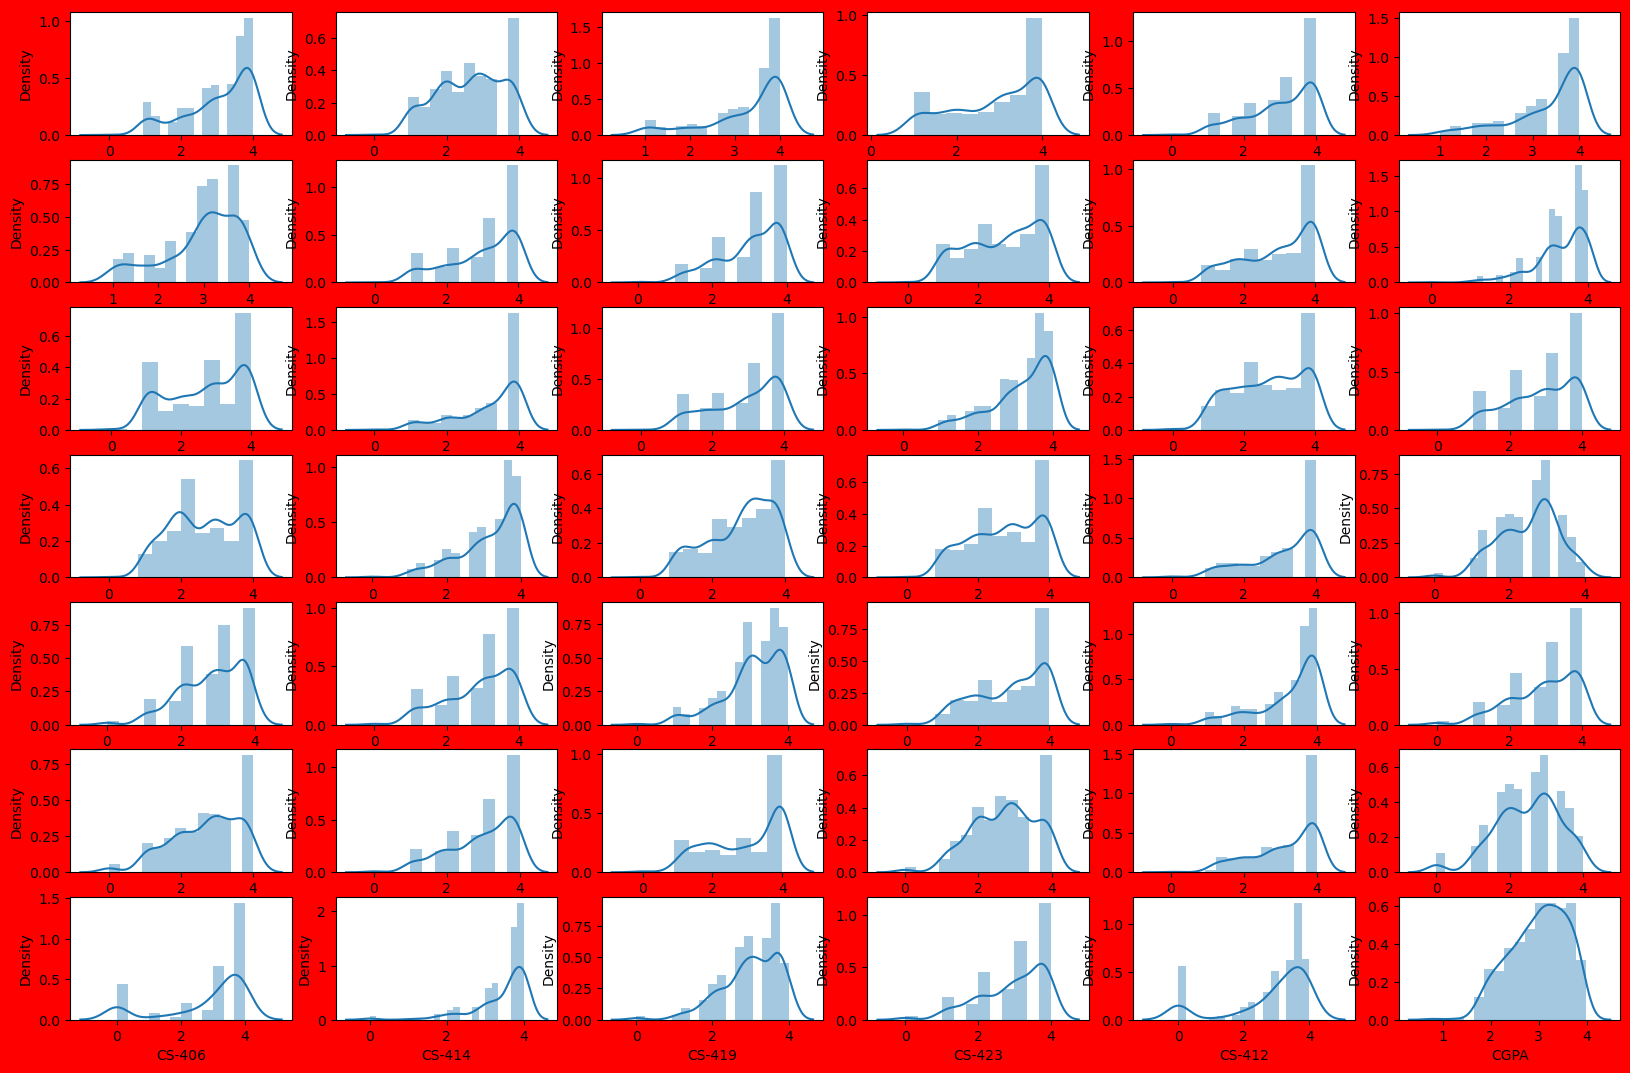

In [24]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'red')
plotnumber = 1

for column in df:
    if plotnumber <= 43:
        ax = plt.subplot(8,6,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

In [25]:
# so we observe some skewness in the dataset

In [26]:
X = df.drop(['CGPA'],axis = 1)
y = df['CGPA']

In [27]:
X

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,...,1.0,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,...,1.7,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,...,3.7,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.3,...,3.3,3.7,3.7,4.0,4.0,4.0,3.3,3.3,3.0,4.0
543,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.7,3.3,3.3,4.0,4.0,3.7,3.0,3.7,2.0,3.7
544,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,3.0,...,3.3,3.7,3.0,4.0,3.3,4.0,2.0,3.3,3.7,3.7
545,4.0,3.3,1.0,4.0,1.0,1.3,2.7,1.7,2.7,1.7,...,3.3,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0


In [28]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
542    3.798
543    3.772
544    3.470
545    2.193
546    1.753
Name: CGPA, Length: 547, dtype: float64

#### Plotting Scatter plot to see relation between feature and label

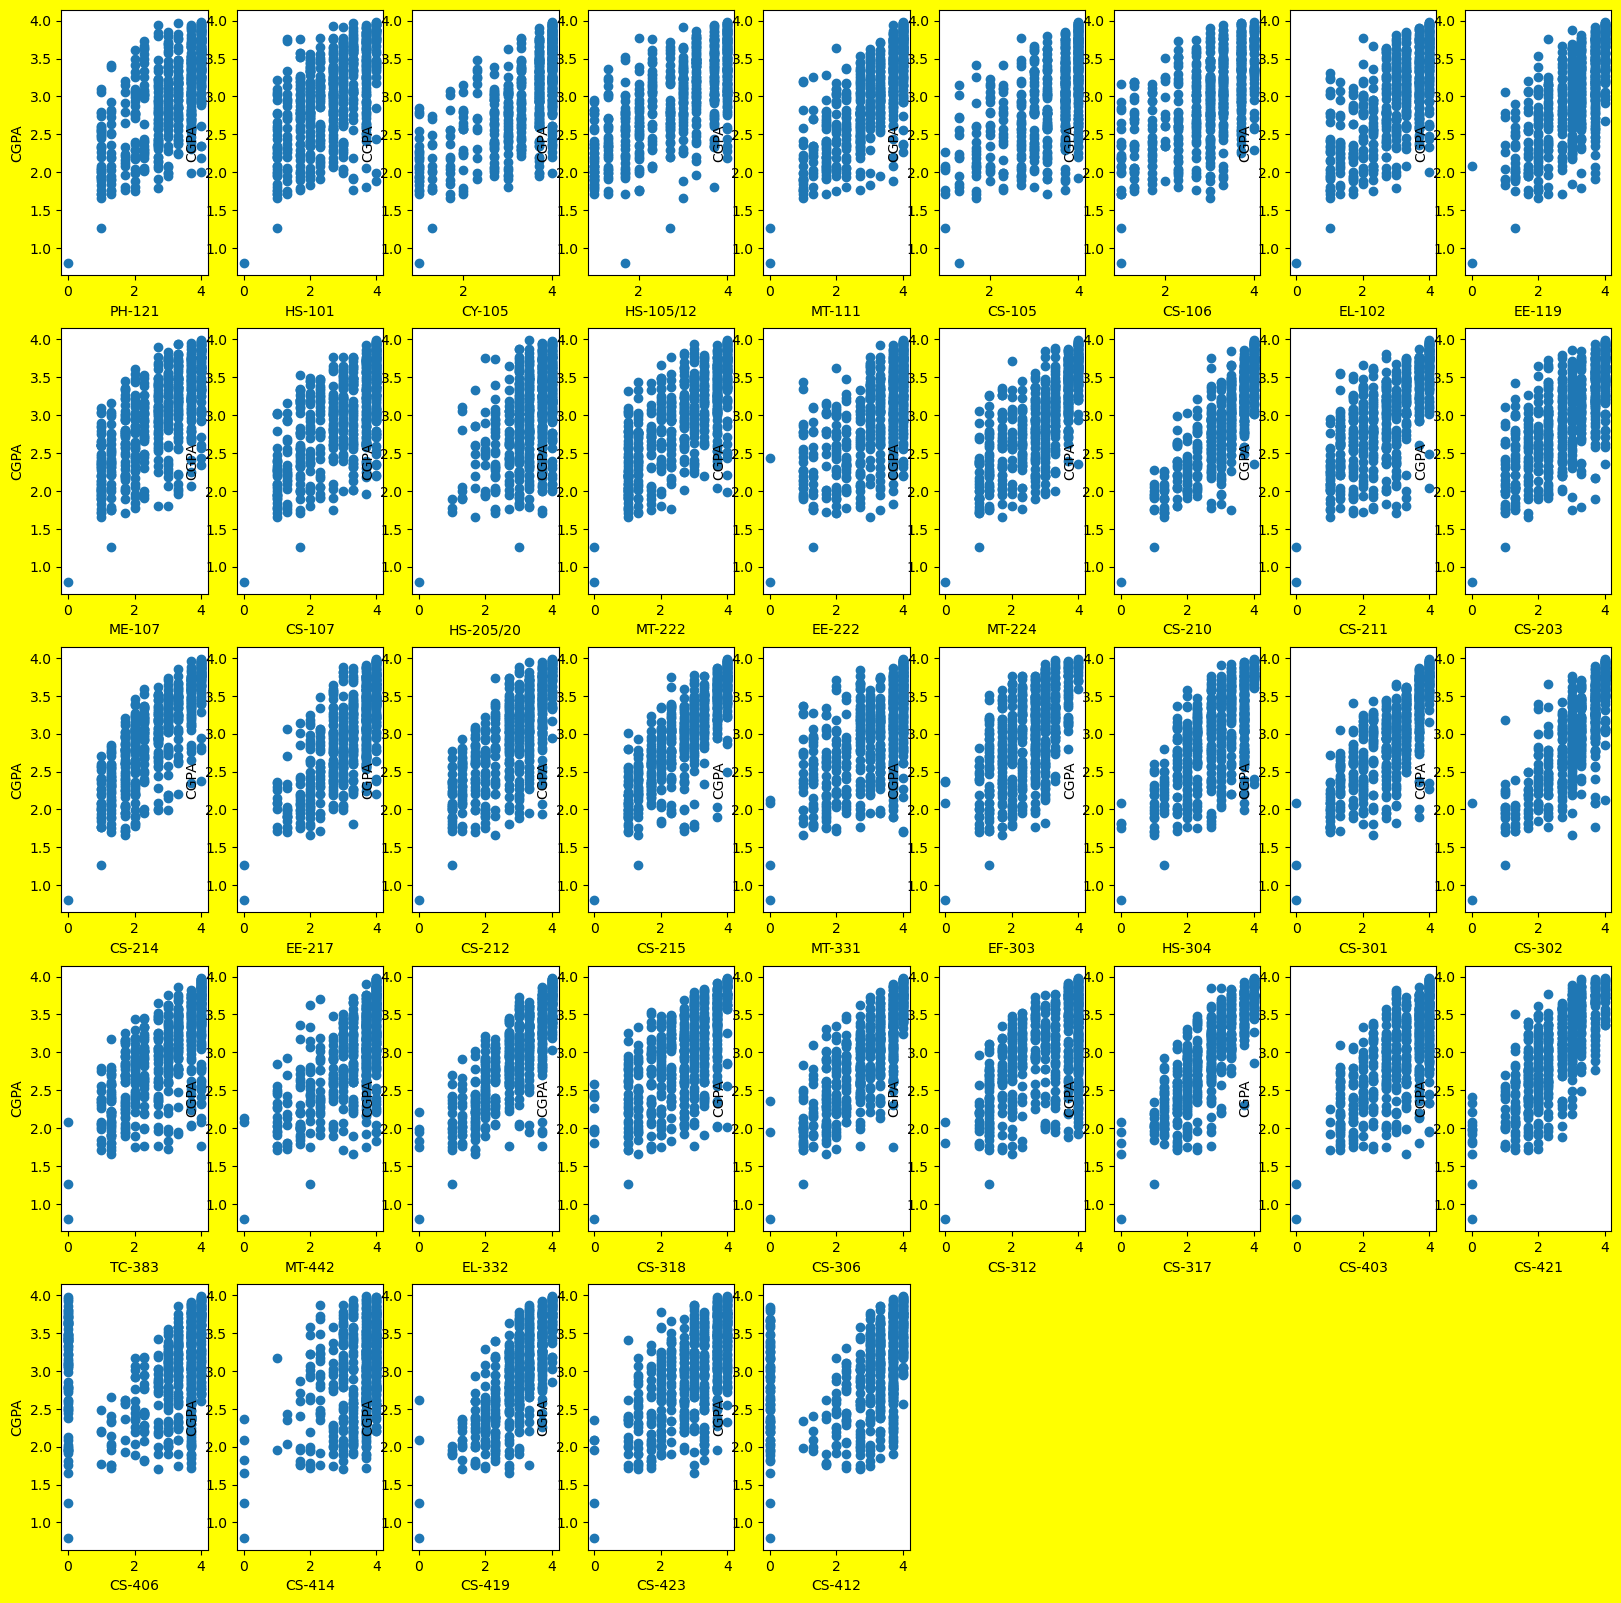

In [29]:
# so find relationship between feature(X) and label(y) by visulization using scatter plot

plt.figure(figsize = (20,20) , facecolor = 'yellow')
plotnumber = 1

for column in X:   #here feature is new X so X
    if plotnumber <= 45:
        ax = plt.subplot(5,9,plotnumber)
        plt.scatter(X[column] , y)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('CGPA' , fontsize = 10)
    plotnumber += 1
plt.show()

In [30]:
#data scaling. Formula z=(x-mean)/std
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
X_scaled

array([[-0.36821902, -1.4824677 , -1.81202779, ..., -1.73009669,
         0.0463981 ,  0.65261299],
       [ 1.00916417, -1.81590102, -2.26622837, ..., -1.33479055,
        -1.06188843,  0.09792816],
       [ 1.00916417,  0.40698778,  0.79962551, ...,  1.30058369,
         0.82219867,  0.89033506],
       ...,
       [-0.05036136,  1.51843217,  0.45897508, ...,  0.3782027 ,
         0.82219867,  0.65261299],
       [ 1.00916417,  0.74042109, -2.6068788 , ..., -0.01710343,
        -0.28608786, -0.69447873],
       [-1.10988689, -1.81590102, -2.6068788 , ...,  0.3782027 ,
        -2.17017495, -0.9322008 ]])

In [32]:
#split data into train and test. module will be build on training data and tested on the test data.
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state= 348)
y_train.head()

489    3.240
79     2.171
532    3.624
242    3.432
234    3.267
Name: CGPA, dtype: float64

In [33]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [34]:
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [35]:
print('Accurate Student Grades is :',regression.predict(scaler.transform([[2.7, 1.3, 1.7, 2, 1.7, 1.3, 1, 1.7, 2.7, 1.7,1.7,3.3,
                                                                           1,3.7,2.7,2.3,1.3,1.3,1,4,1,1.7,2,1.7,2.3,3,2,2.3,
                                                                           3.3,2,1.7,2,1.7, 1.7, 1.7, 1.7, 3.7, 4,1.7,3, 3.7]])))

Accurate Student Grades is : [2.18559598]


In [36]:
print("Accuracy=",regression.score(x_test,y_test)*100,"%")

Accuracy= 98.97283544982643 %


In [37]:
print("Accuracy=",regression.score(x_train,y_train)*100,"%")

Accuracy= 99.32645524248454 %


### Model Score
### Training Score = 95.06013222840385 %
### Testing Score = 98.2552786112594 %

In [38]:
y_pred = regression.predict(x_test)

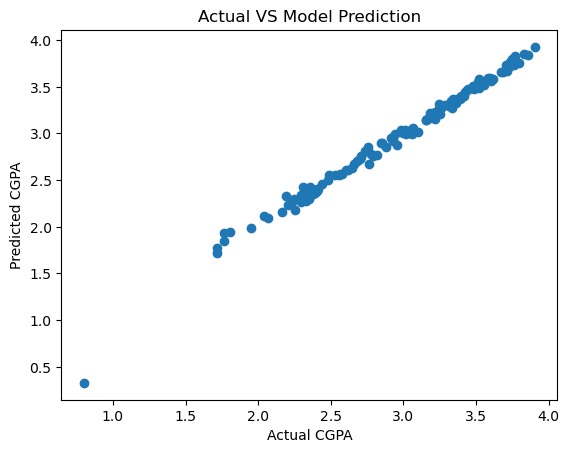

In [39]:
# how our pred vs actual look like in graph 
plt.scatter(y_test , y_pred)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual VS Model Prediction')
plt.show()

### Checking MAE , MSE & RMSE scores

In [40]:
#error in terms of numbers
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [41]:
# again predict 
y_pred = regression.predict(x_test)

In [42]:
#MAE
mean_absolute_error(y_test,y_pred)

0.03499399820518282

In [43]:
#MSE
mean_squared_error(y_test,y_pred)

0.003457176309558118

In [44]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.05879775769158309

In [45]:
#import library
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

### Scores
##### MAE SCORE = 0.06256401089689284
##### MSE SCORE = 0.006287210821578076
##### RMSE SCORE = 0.0792919341520818

### LASSO MODEL

In [46]:
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [47]:
# best aplha parameter
alpha = lasscv.alpha_
alpha

0.0001124068676226783

In [48]:
# now we have best parametr noe train according to it
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0001124068676226783)

In [49]:
# now we have best parametr noe train according to it
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0001124068676226783)

In [50]:
# now check r2 score
lasso_reg.score(x_test,y_test)

0.9897207392876599

### RIDGE MODEL

In [51]:
ridgecv = RidgeCV(alphas = np.arange(0.001, 0.1, 0.01))

ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [52]:
# best aplha parameter
alpha = ridgecv.alpha_
alpha

0.09099999999999998

In [53]:
# now we have best parametr noe train according to it
ridge_reg = Ridge(alpha)
ridge_reg.fit (x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [54]:
# now check r2 score
ridge_reg.score(x_test,y_test)

0.9897294969598868

### SCORES
#### LASSO SCORES = 98.97207392876599 %
#### RIDGE SCORES =  98.97294969598868 %

### DataFrame

In [57]:
CGPA = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [58]:
CGPA

,Actual,Predicted
274,3.521,3.588167
406,3.334,3.271721
16,3.248,3.314179
522,3.019,3.015408
85,2.378,2.351365
...,...,...
36,3.164,3.157104
459,2.414,2.399996
288,2.775,2.776556
475,3.346,3.331891


# Model Score
### Training Score = 95.06013222840385 %
### Testing Score = 98.2552786112594 %